In [4]:
import numpy as np
from enum import Enum

class Name(Enum):
    cube_depth_position = 1

name = Name.cube_depth_position

if name == Name.cube_depth_position:
    x_labels = [1, 2, 3, 5, 10]
    y_labels = ["side", "top", "bottom"]
    default_path = "C:/Users/tsvdh/OneDrive/Documenten/thesis/results/cube_depth-position/error/cube_error_depth-X_position-Y.txt"
    scalar = 1000
    rounding = 2
    plot_x_label = "position"
    plot_y_label = "depth"
else:
    print(f"Invalid name: {name}")
    exit(0)

absolute_error = np.zeros((len(y_labels), len(x_labels)))
positive_error = np.zeros((len(y_labels), len(x_labels)))
negative_error = np.zeros((len(y_labels), len(x_labels)))

for x in range(len(x_labels)):
    for y in range(len(y_labels)):
        path = default_path.replace("Y", str(y_labels[y])).replace("X", str(x_labels[x]))

        with open(path) as file:
            absolute_error[y, x] = round(float(file.readline()) * scalar, rounding)
            positive_error[y, x] = round(float(file.readline()) * scalar, rounding)
            negative_error[y, x] = round(float(file.readline()) * scalar, rounding)

negative_error = np.absolute(negative_error)

print(absolute_error)
print(positive_error)
print(negative_error)

[[0.28 0.88 0.56 0.73 0.95]
 [0.4  0.93 0.94 1.35 1.67]
 [0.15 0.47 0.28 0.35 0.5 ]]
[[0.13 0.06 0.32 0.52 0.69]
 [0.2  0.15 0.69 1.13 1.39]
 [0.06 0.   0.09 0.18 0.28]]
[[0.15 0.82 0.24 0.21 0.25]
 [0.2  0.78 0.25 0.22 0.29]
 [0.08 0.46 0.19 0.17 0.22]]


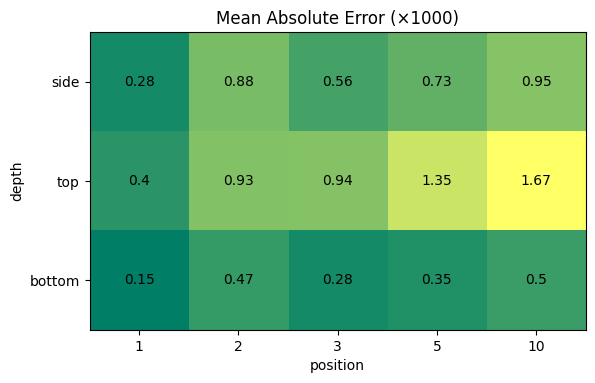

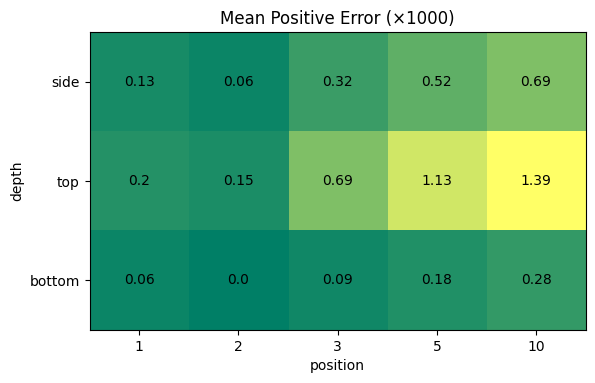

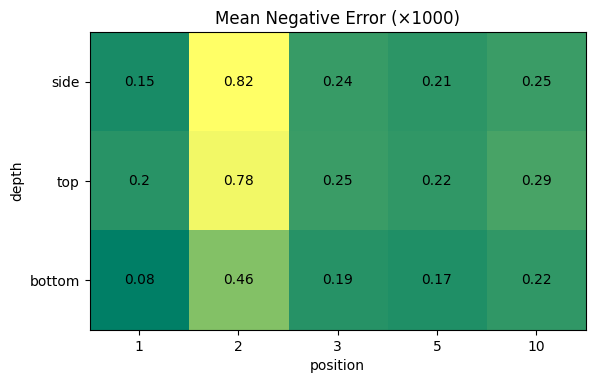

In [9]:
import matplotlib.pyplot as plt

for i, error in enumerate([absolute_error, positive_error, negative_error]):
    fig, ax = plt.subplots()
    im = ax.imshow(error, cmap="summer")

    plt.xlabel(plot_x_label)
    plt.ylabel(plot_y_label)

    ax.set_xticks(np.arange(len(x_labels)), labels=x_labels)
    ax.set_yticks(np.arange(len(y_labels)), labels=y_labels)

    for x in range(len(x_labels)):
        for y in range(len(y_labels)):
            ax.text(x, y, error[y, x], ha="center", va="center", color="black")

    if i == 0:
        errorType = "A"
        errorName = "Absolute"
    elif i == 1:
        errorType = "P"
        errorName = "Positive"
    else:
        errorType = "N"
        errorName = "Negative"

    ax.set_title(f"Mean {errorName} Error (\u00D71000)")
    plt.savefig(f"{name.name}_M{errorType}E.pdf", bbox_inches="tight")
    plt.savefig(f"{name.name}_M{errorType}E.png", bbox_inches="tight")